# 💻 Heart Disease Prediction - Gradio Web App

This notebook creates an interactive Gradio web interface where users can enter clinical values and receive a heart disease prediction based on the trained Random Forest model.


In [84]:
# Install Gradio (only needed once)
!pip install gradio

In [85]:
import gradio as gr
import joblib
import numpy as np

## 📦 Load Trained Model and Selected Features


In [86]:
model = joblib.load("/content/models/best_random_forest.pkl")
selected_features = joblib.load("/content/selected_features.pkl")

## 🏷️ Feature Labels for User Interface


In [87]:
feature_labels = {
    'age': "Age (Years)",
    'sex': "Sex (0 = Female, 1 = Male)",
    'cp': "Chest Pain Type (0–3)",
    'trestbps': "Resting Blood Pressure (mm Hg)",
    'chol': "Serum Cholesterol (mg/dl)",
    'fbs': "Fasting Blood Sugar > 120 mg/dl (1 = Yes, 0 = No)",
    'restecg': "Resting ECG Result (0–2)",
    'thalach': "Max Heart Rate Achieved",
    'exang': "Exercise Induced Angina (1 = Yes, 0 = No)",
    'oldpeak': "ST Depression Induced by Exercise",
    'slope': "Slope of ST Segment (0–2)",
    'ca': "Number of Major Vessels Colored (0–3)",
    'thal': "Thalassemia (1 = Normal, 2 = Fixed Defect, 3 = Reversible Defect)"
}

## 🧠 Prediction Function


In [88]:
def predict_heart_disease(*inputs):
    X = np.array(inputs).reshape(1, -1)
    pred = model.predict(X)[0]
    prob = model.predict_proba(X)[0][1]
    if pred == 1:
        result = "✅ **Positive**: Heart Disease Detected"
    else:
        result = "❌ **Negative**: No Heart Disease"
    return result, f"{prob:.2%}"


## 🎛️ Build Gradio Interface


In [89]:
with gr.Blocks(theme=gr.themes.Soft()) as demo:
    gr.Markdown("# 💓 Heart Disease Risk Prediction")
    gr.Markdown(
        "Enter your clinical measurements below. This tool uses a trained machine learning model to assess heart disease risk."
    )

    input_fields = []
    half = len(selected_features) // 2 + len(selected_features) % 2
    col1_features = selected_features[:half]
    col2_features = selected_features[half:]

    with gr.Row():
        with gr.Column():
            for feature in col1_features:
                label = feature_labels.get(feature, feature.replace('_', ' ').title())
                input_fields.append(gr.Number(label=label))
        with gr.Column():
            for feature in col2_features:
                label = feature_labels.get(feature, feature.replace('_', ' ').title())
                input_fields.append(gr.Number(label=label))

    predict_button = gr.Button("🔍 Predict", variant="primary")

    gr.Markdown("### 🧾 Prediction Result")
    result_output = gr.Markdown()
    probability_output = gr.Label(label="Confidence (Probability)")

    predict_button.click(
        fn=predict_heart_disease,
        inputs=input_fields,
        outputs=[result_output, probability_output]
    )

    gr.Markdown("""---
    ### ℹ️ Notes:
    - **Sex**: 0 = Female, 1 = Male
    - **Chest Pain Type (cp)**: 0 = Typical, 1 = Atypical, 2 = Non-anginal, 3 = Asymptomatic
    - **Fasting Blood Sugar (fbs)**: 1 = >120 mg/dl
    - **Thalassemia (thal)**: 1 = Normal, 2 = Fixed defect, 3 = Reversible defect
    """)


In [90]:
if __name__ == "__main__":
    demo.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://66562c7cac2d2dba57.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [91]:
demo.launch(share=True)  # gives public link

Rerunning server... use `close()` to stop if you need to change `launch()` parameters.
----
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://66562c7cac2d2dba57.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# 🖼️ User Interface Screens from the Sprints Project Deployment


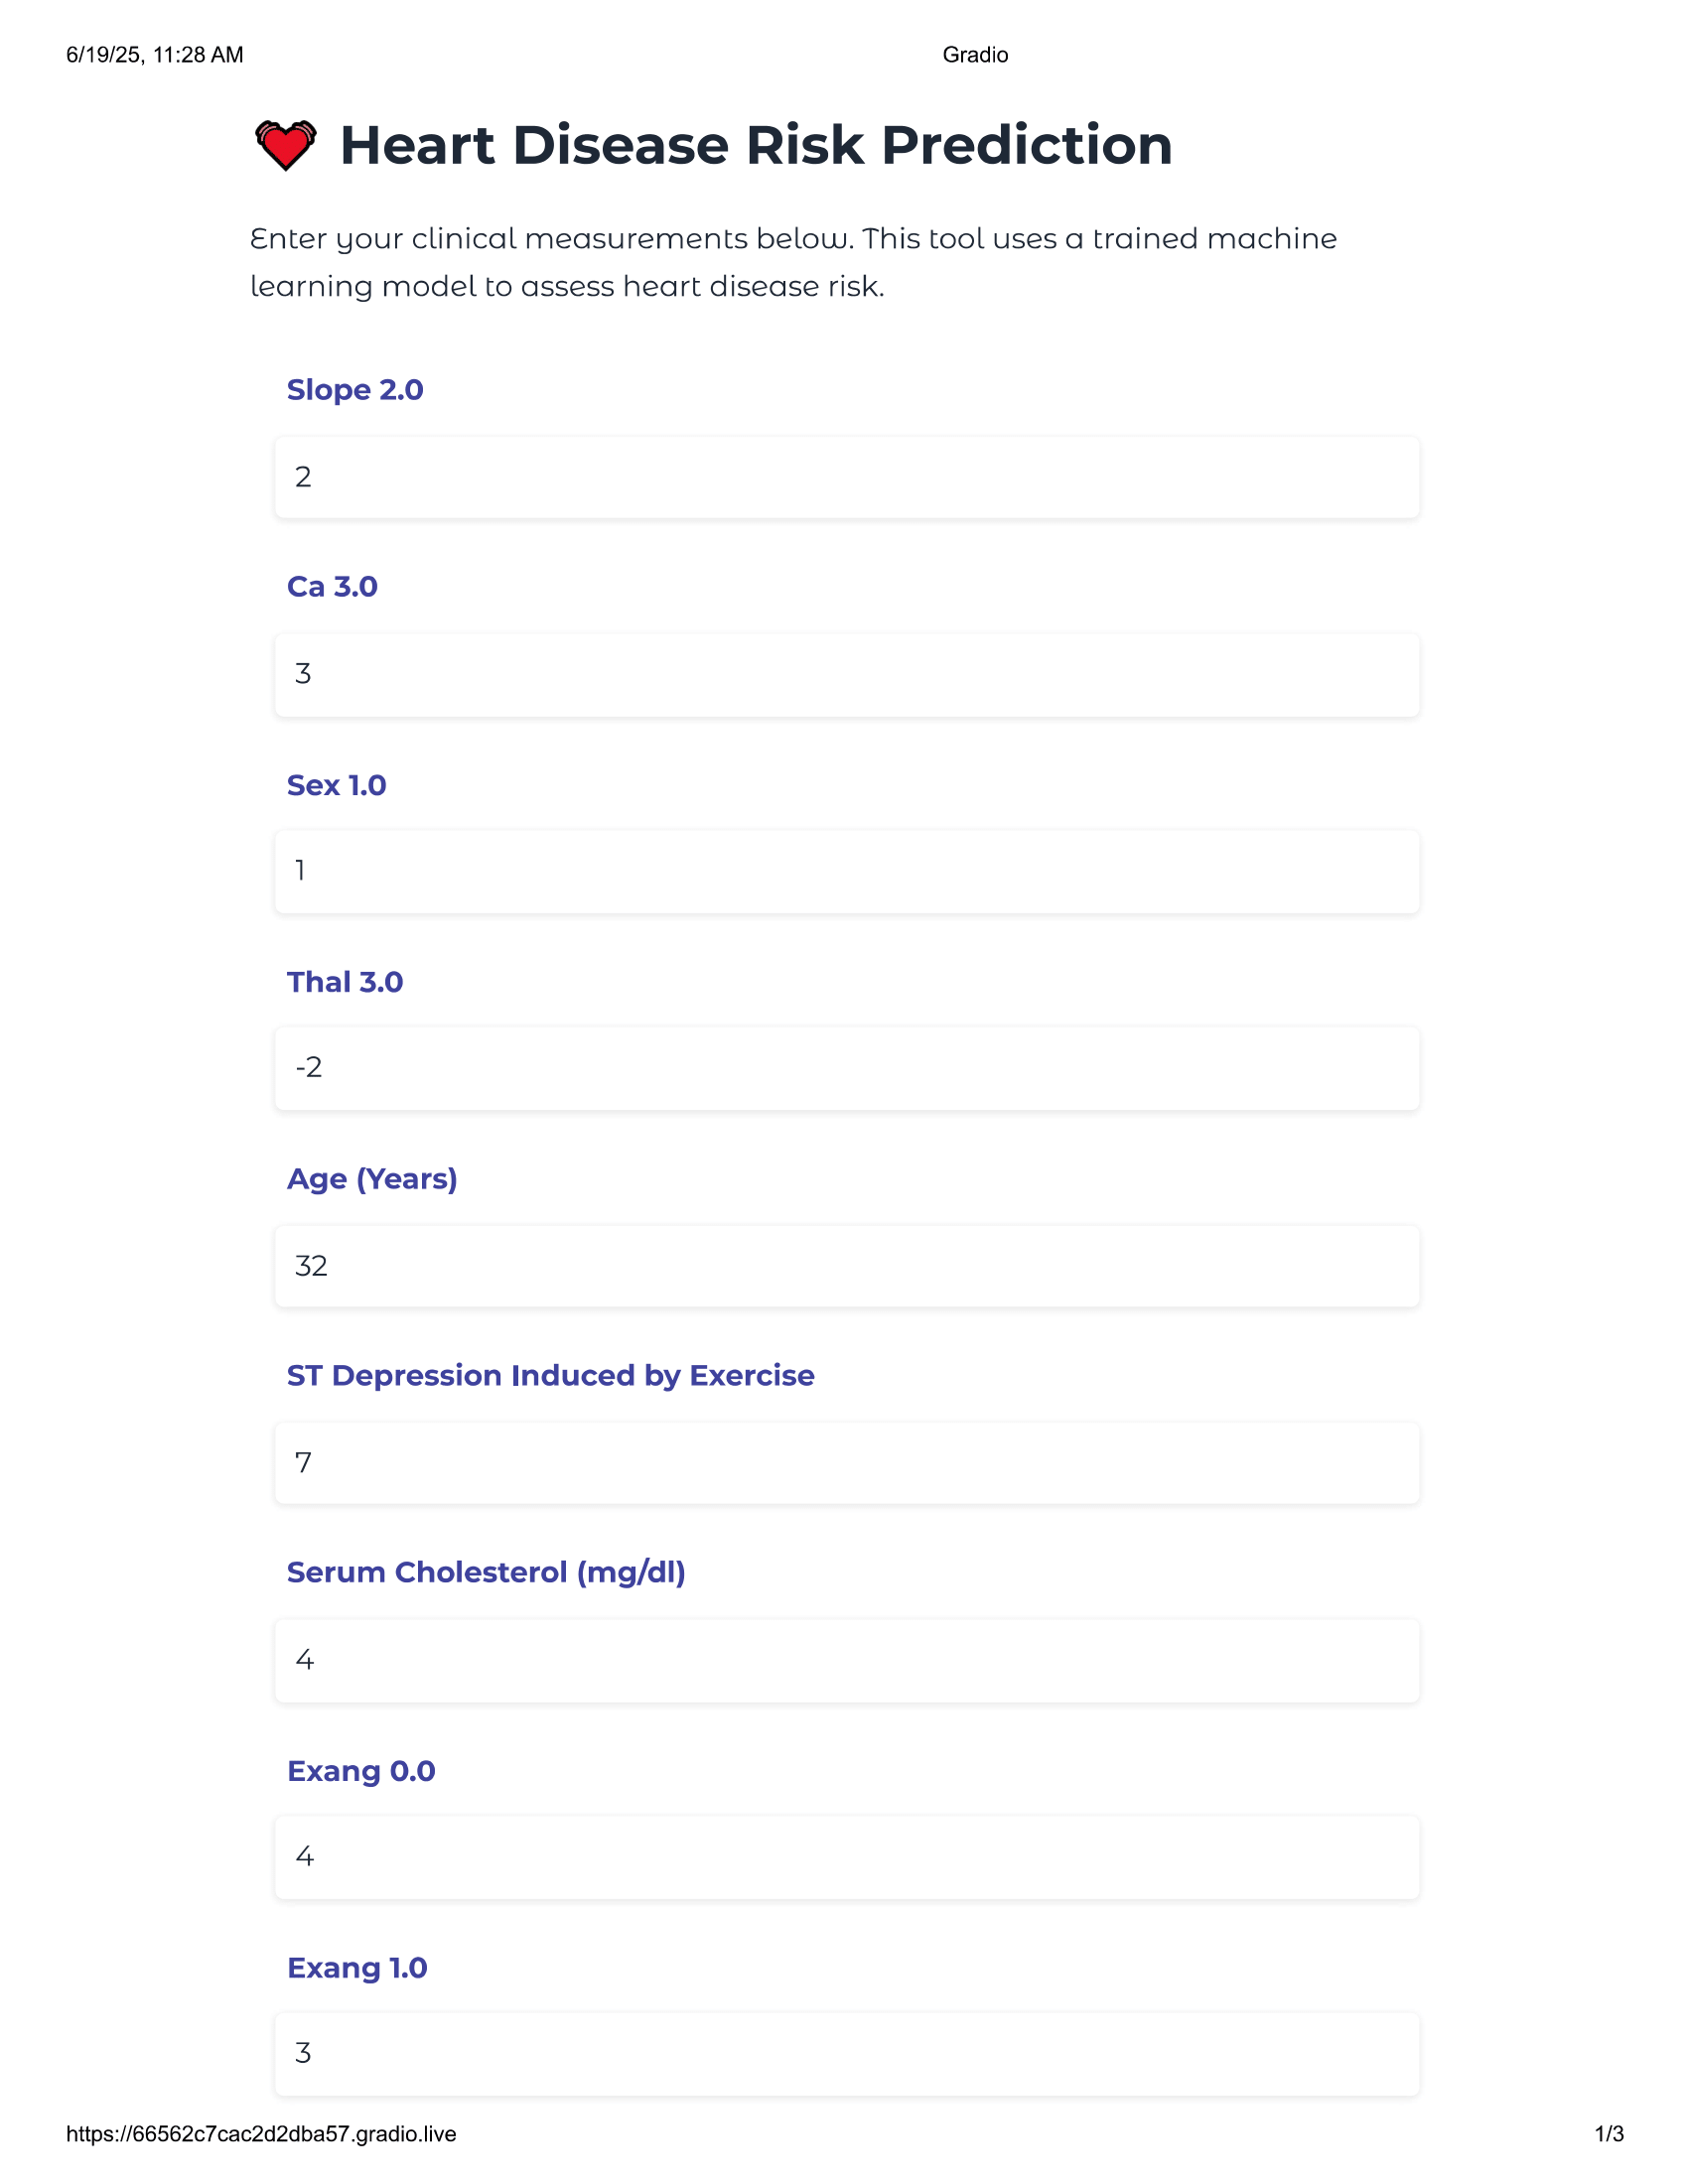

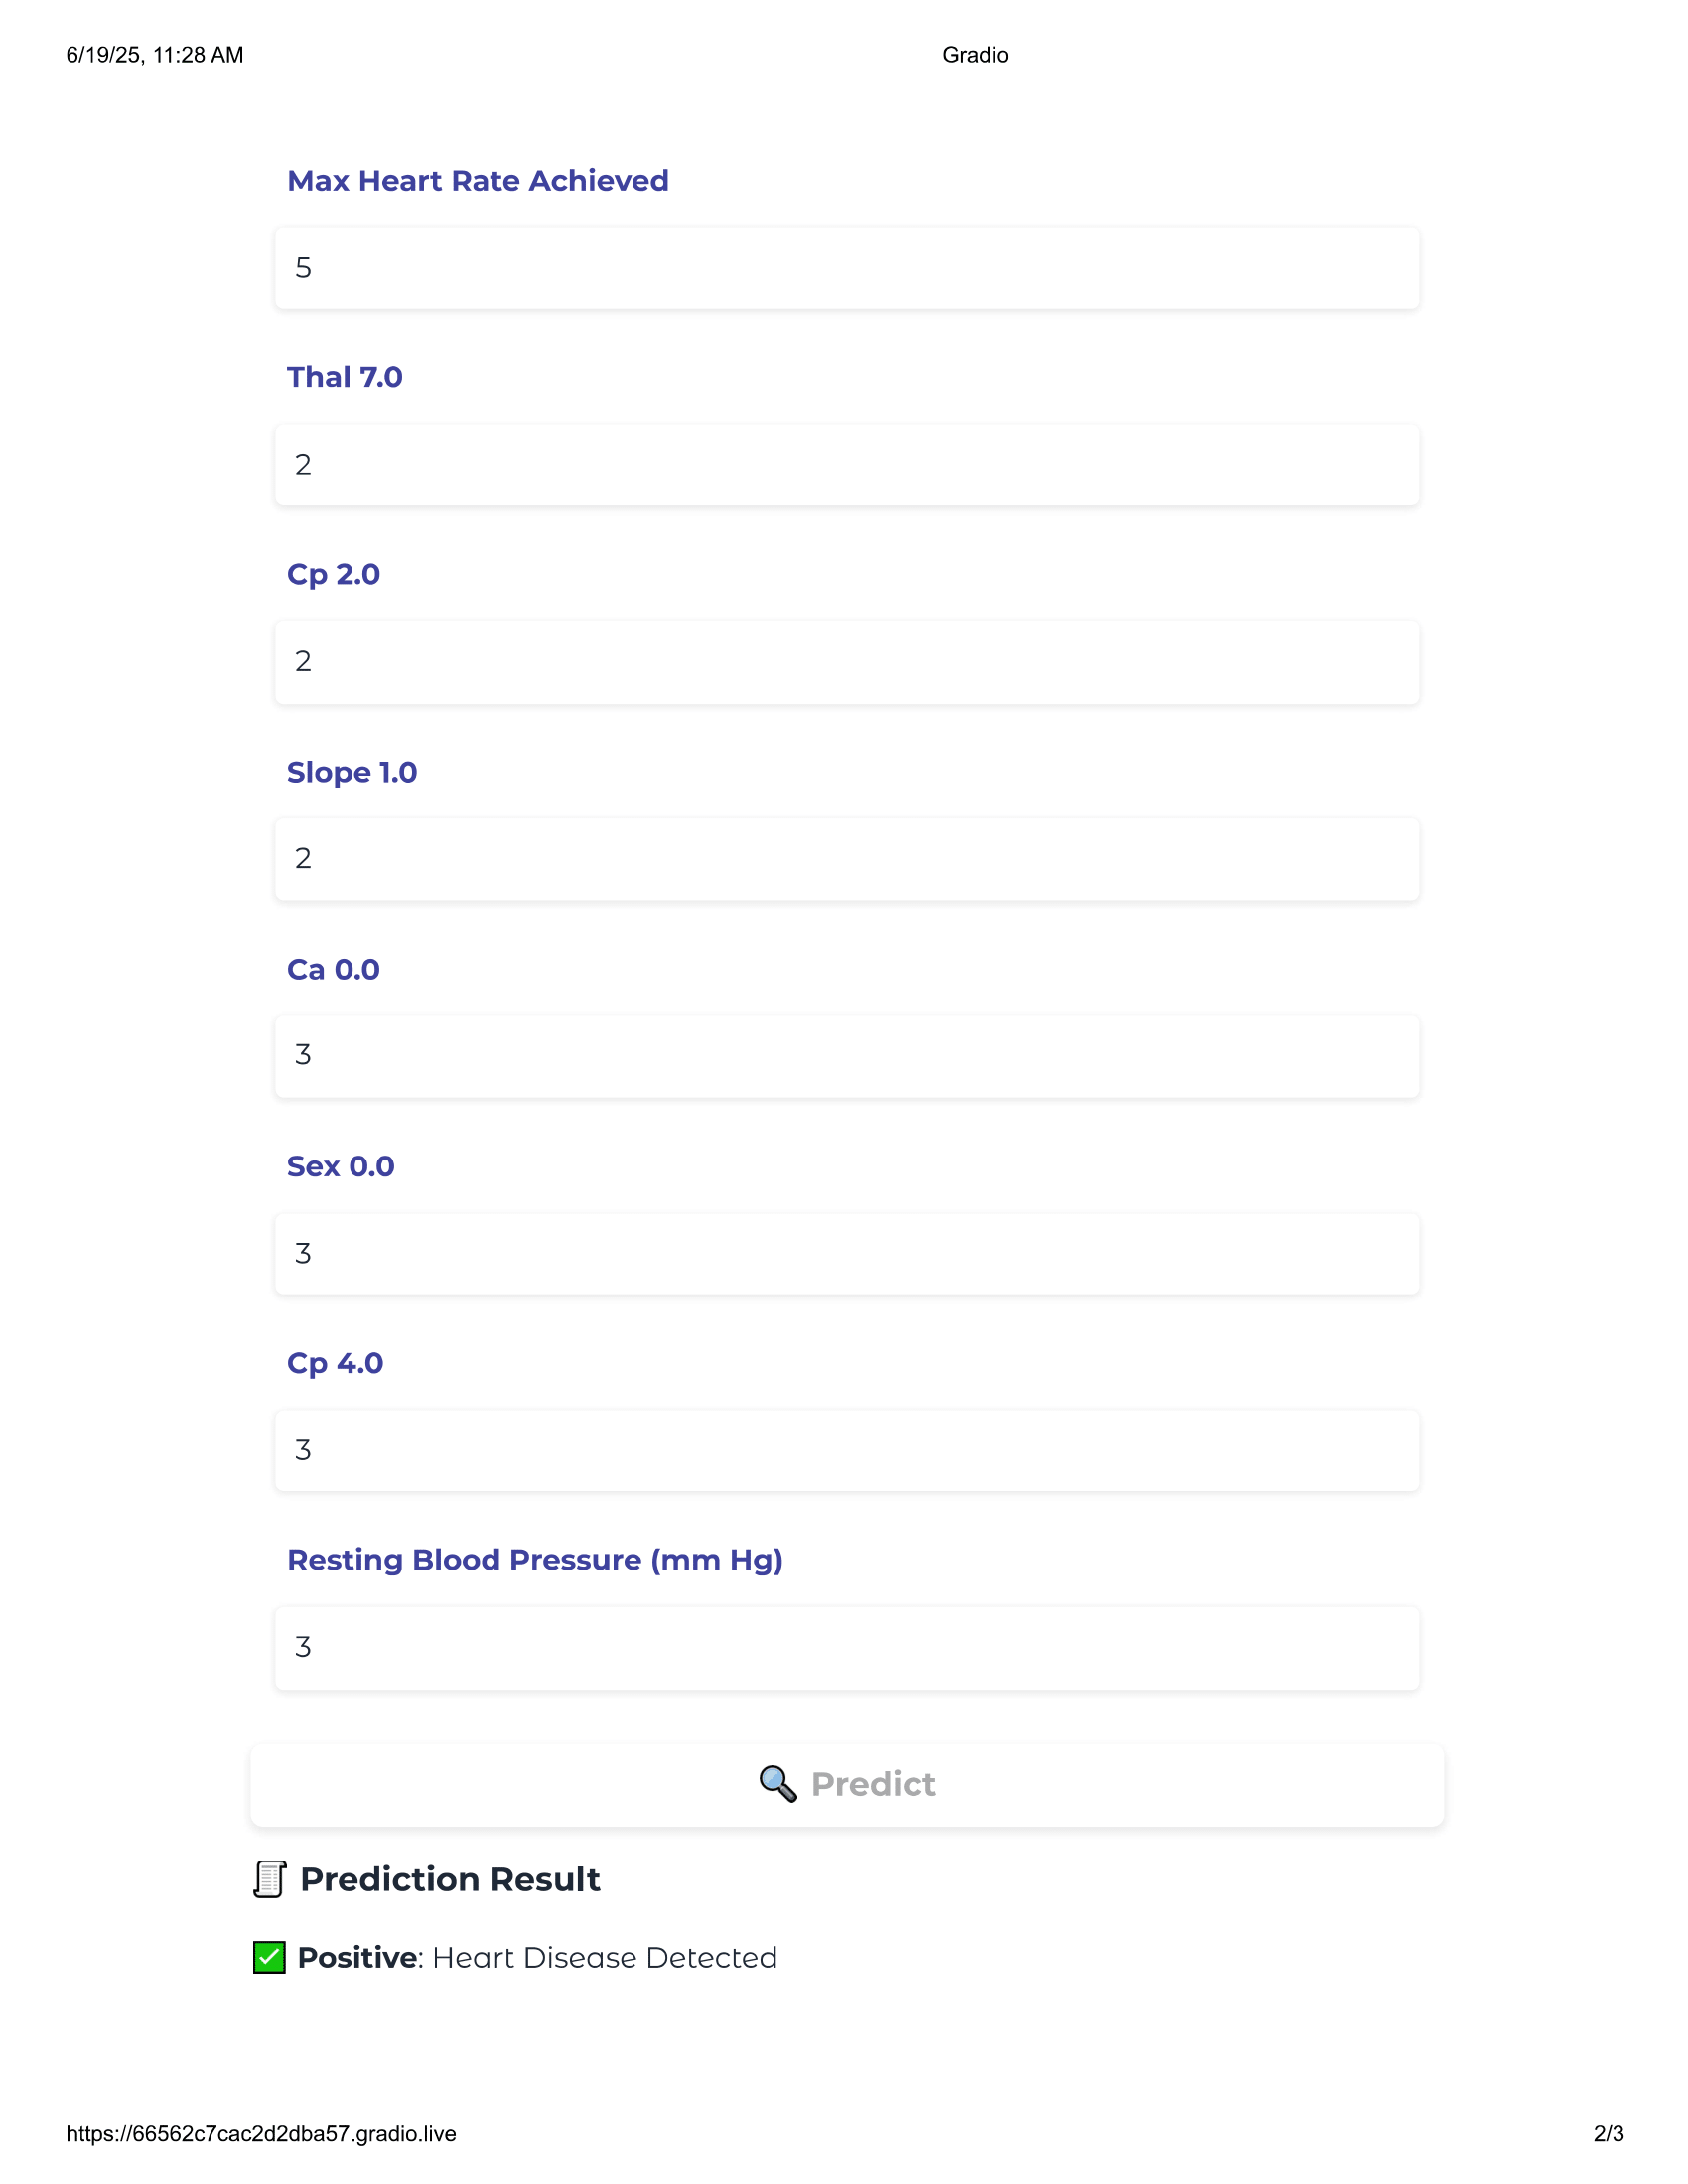

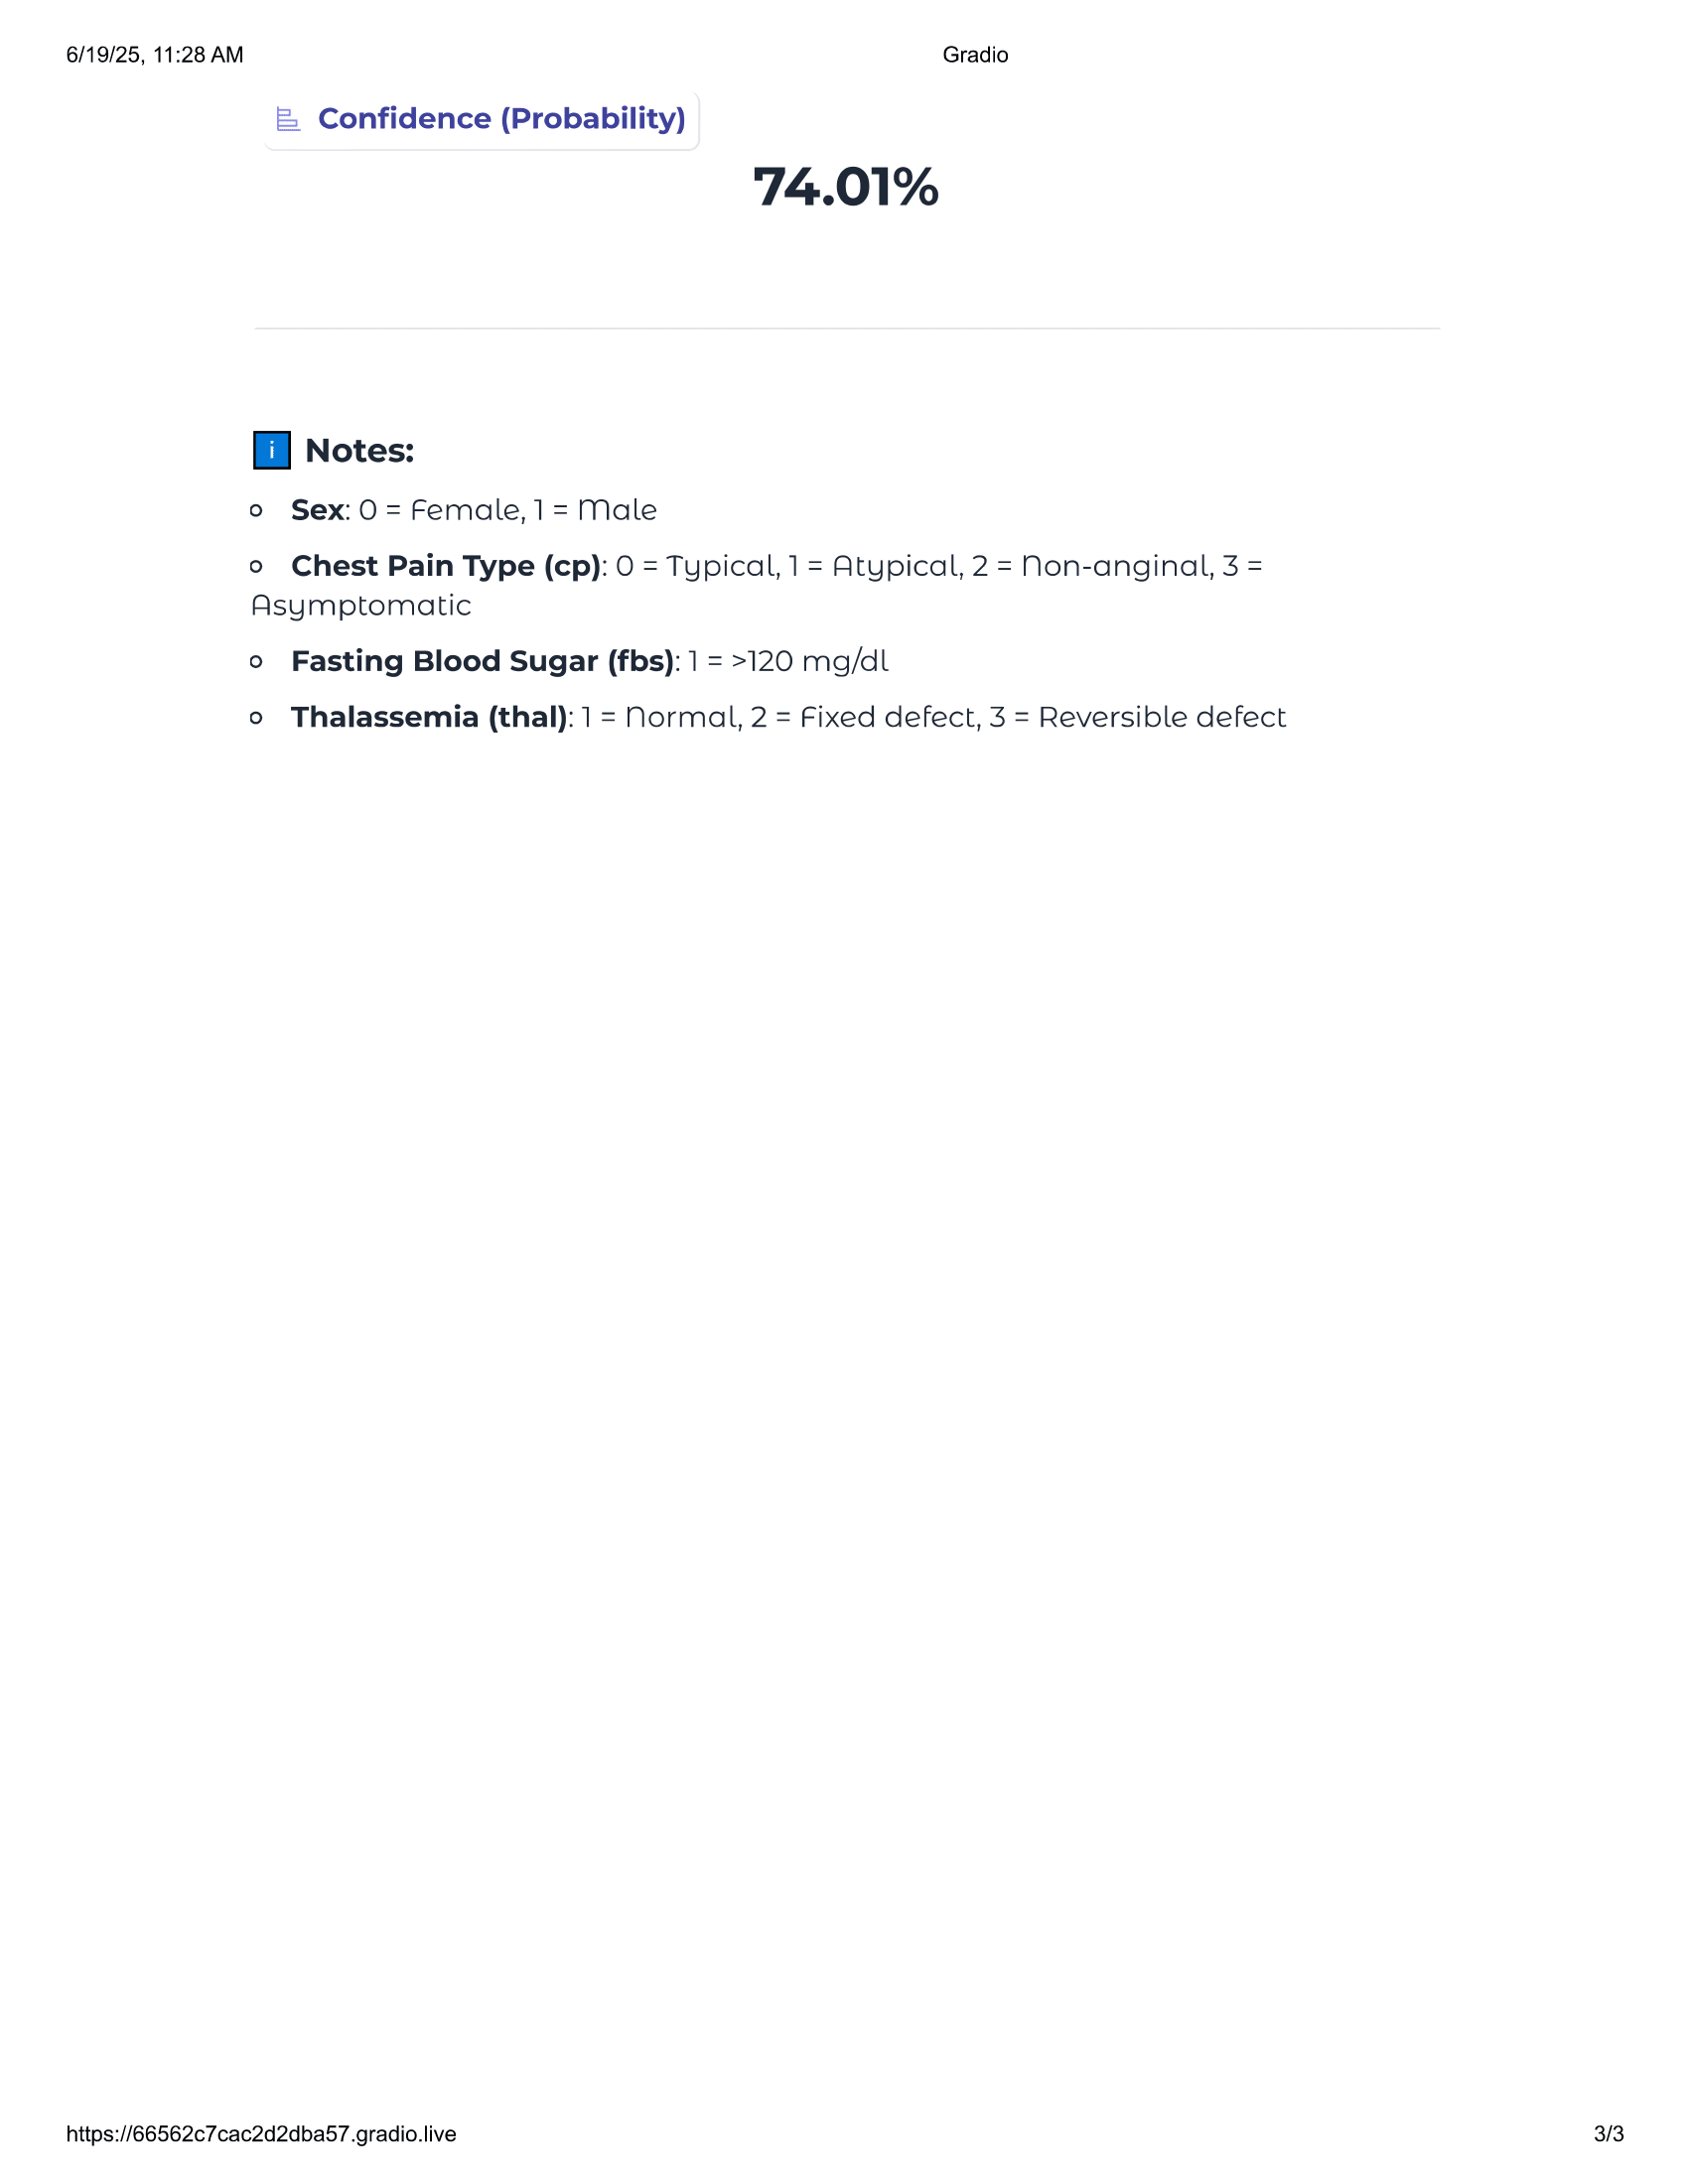